# Generator

In [1]:
from model.op import FusedLeakyReLU, fused_leaky_relu, upfirdn2d

In [2]:
from model.sg2_model import Generator

In [3]:
import torch
device = 'cpu'

In [4]:
net = Generator(1024, style_dim=512, n_mlp=8,)
net.to(device)

checkpoint = torch.load('pretrained/StyleGAN2/stylegan2-ffhq-config-f.pt', map_location=device)
net.load_state_dict(checkpoint['g_ema'], strict=True)

<All keys matched successfully>

In [5]:
from utils.sg2_utils import mixing_noise
z = mixing_noise(1, 512, 0.9,
                        device)

In [41]:
from torchvision.transforms import Resize
import numpy as np
img_t = net(z)[0].squeeze()
img = Resize(512)(img_t).permute(1, 2, 0).cpu().detach().numpy()
img = np.round((np.clip(img, -1, 1) + 1) / 2 * 255).astype(np.uint8)

/usr/local/anaconda3/envs/DomainAdapation/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


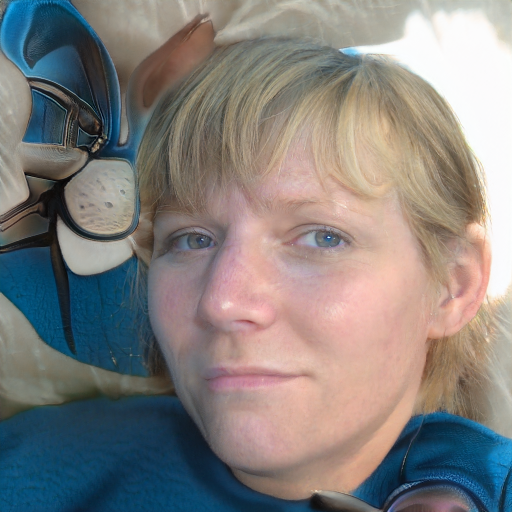

In [44]:
from PIL import Image
data = Image.fromarray(img)
data

In [45]:
data.save('example.png')

da_model.py         loss.py             patches.py          trainer.py
dataset.py          model/              pretrained/         utils/
example.png         parametrization.py  test.ipynb


In [2]:
from utils.II2S import II2S
from utils.II2S_options import II2S_s_opts

/usr/local/anaconda3/envs/DomainAdapation/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/usr/local/anaconda3/envs/DomainAdapation/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <9B280146-BBD7-3F77-9873-F9740F2A5329> /usr/local/anaconda3/envs/DomainAdapation/lib/python3.10/site-packages/torchvision/image.so
  Expected in:     <F7AE755F-2C08-3F6F-BD86-4A77C452FBB5> /usr/local/anaconda3/envs/DomainAdapation/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [3]:
II2S_s_opts.device

'cpu'

In [4]:
ii2s = II2S(II2S_s_opts)

Loading StyleGAN2 from checkpoint: pretrained/StyleGAN2/stylegan2-ffhq-config-f.pt
Setting up Perceptual loss...


/usr/local/anaconda3/envs/DomainAdapation/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/anaconda3/envs/DomainAdapation/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /Users/veronikalebedyuk/Desktop/project/DomainAdapation/core/lpips/weights/v0.1/vgg.pth
...[net-lin [vgg]] initialized
...Done


In [6]:
from core.dataset import ImagesDataset

In [7]:
style_image_info = ImagesDataset(II2S_s_opts,'example.png')[0]

In [8]:
latent = ii2s.invert_image(style_image_info[0],
                           style_image_info[1],)

II2S invert processing:   0%|          | 0/1000 [00:00<?, ?it/s]

RuntimeError: Cannot initialize CUDA without ATen_cuda library. PyTorch splits its backend into two shared libraries: a CPU library and a CUDA library; this error has occurred because you are trying to use some CUDA functionality, but the CUDA library has not been loaded by the dynamic linker for some reason.  The CUDA library MUST be loaded, EVEN IF you don't directly use any symbols from the CUDA library! One common culprit is a lack of -Wl,--no-as-needed in your link arguments; many dynamic linkers will delete dynamic library dependencies if you don't depend on any of their symbols.  You can check if this has occurred by using ldd on your binary to see if there is a dependency on *_cuda.so library.

In [12]:
style_image_info['image_high_res_torch']

TypeError: tuple indices must be integers or slices, not str

In [13]:
style_image_info

(tensor([[[ 0.0588, -0.2314, -0.2549,  ...,  0.5294,  0.4745,  0.3255],
          [-0.3647, -0.1059, -0.1137,  ...,  0.5294,  0.5137,  0.4431],
          [-0.2941, -0.1451, -0.2078,  ...,  0.5137,  0.5373,  0.5059],
          ...,
          [-0.9843, -0.9765, -0.9608,  ..., -0.8431, -0.8824, -0.8902],
          [-0.9608, -0.9686, -0.9451,  ..., -0.8667, -0.8353, -0.8353],
          [-0.8667, -0.9529, -0.9137,  ..., -0.7882, -0.7804, -0.6157]],
 
         [[ 0.1216, -0.1686, -0.1765,  ...,  0.5294,  0.4824,  0.3725],
          [-0.2941, -0.0588, -0.0667,  ...,  0.5137,  0.4824,  0.4745],
          [-0.2314, -0.1059, -0.1843,  ...,  0.5216,  0.5216,  0.5294],
          ...,
          [-0.3882, -0.3804, -0.3569,  ..., -0.1059, -0.1451, -0.2392],
          [-0.4118, -0.3961, -0.3647,  ..., -0.1216, -0.1216, -0.2314],
          [-0.4588, -0.4275, -0.3647,  ..., -0.1294, -0.1529, -0.1451]],
 
         [[ 0.0275, -0.2549, -0.2157,  ...,  0.3490,  0.3333,  0.2471],
          [-0.3333, -0.1216,